<a href="https://colab.research.google.com/github/NiceName1111/Text_Analysis_Final_Feng/blob/main/final_project_Peng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overall Content**:
1. Project proposal and introduction
   - topic and questions
   - hypotheses
   - introduction to data collection
2. Preparation
   - upgrade necessary packages
   - import necessary packages
3. Coding Part
   - introduction of methods
   - Data cleaning
   - Data processing
   - Result exhibitions

# **PART 1**: Project Proposal and Introduction

## 1.1 Topic and Research Question
The Federal Open Market Committee (FOMC) plays a critical role in displaying the policymakers’ consideration of U.S. monetary policy, and its releases are always scrutinized word by word by market participants to interpret the direction of interest rates or other economic measures. Its contents often influence the equity market, exchange rate, and credit swap market significantly. However, while qualitative interpretations abound, few studies have applied quantitative or computational methods to analyze these press releases systematically. <br> <br>
The goal of this project is to utilize computational tools to analyze (1) ** the FOMC policy statement** and  (2) **minutes** to identify patterns in the language that could signal incoming monetary policy actions. Specifically, I aim to answer the following research question:<br> **Can changes in the language and tone of FOMC press releases imply future policy interest rate changes?**



## 1.2 Hypotheses
The project will test two primary hypotheses:<br>
- Hypothesis 1: **An increase in the use of positive language describing economic conditions is associated with a reduced likelihood of an imminent rate cut.**
- Hypothesis 2: A **significant shift in the language used to describe the economic outlook** (e.g., from positive to cautious that describes the concern of a potential economic downturn) **signals a high probability of changes in policy direction in the coming FOMC meetings**.

These hypotheses are based on the assumption that the FOMC, while remaining cautious and neutral in tone, still tries to clearly signal its future policy intentions and its expectation of market performance through its choice of words. At the same time, monetary tightening and easing would consider if the economic outlook can stand the pressure or stimulation from the monetary policies

## 1.3 Data Collection
### **Text data**
The text data for this project will consist of FOMC policy statements and minutes since 2000. <br>
The following link is the source of the data: https://raw.githubusercontent.com/vtasca/fed-statement-scraping/master/communications.csv <br>
Reasons to pick these data:
1. They cover four rounds of rate hikes and rate cuts covering decisions by Alan Greenspan, Ben Bernanke, Janet Yellen, and Jay Powell. Therefore, they are typical
2. Sample size covers over 440 minutes + statements, the size is large enough to extract useful information

The data will be used to test the hypothesis through 3 rounds of tests:
1. Keyword frequency test
2. Sentiment Analysis
3. TF-IDF test

The main way of showing the result is through visualizations, which contain charts and two-axis graphs



### **Rate data**
Secondly, the numeric data for this project is the federal fund rate set by the Fed since 2000.(Board of Governors of the Federal Reserve System (US),2024) The sources is the following:
1. [Federal Funds Target Range - Lower Limit (data since Dec 2008)](https://fred.stlouisfed.org/series/DFEDTARL)
2. [Federal Funds Target Rate (data before Dec 2008)](https://fred.stlouisfed.org/series/DFEDTAR)

The sample size is greater than 9000

The federal fund rate data contains two parts because the Fed set out a reform in 2008, changing the policy rate from setting a specific rate to setting a target rate range

# **PART 2**: Preparation
This step will include the following work:
1. upgrade the necessary language processing package
2. import the usable package and diagnose any issue with using the package

## 2.1: package upgrade: nltk

In [1]:
# upgrade the necessary package nltk for language processing
!pip install --upgrade nltk

## 2.2: import the necessary package

In [2]:
%matplotlib inline

In [3]:
pip install -U kaleido

In [4]:
!pip install vl-convert-python

In [5]:
# import the necessary package
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [6]:
# load spacy to recignize the name entities and process data cleaning
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

In [7]:
# use for stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# to read the data csv stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# For data visualization if needed
import matplotlib.pyplot as plt

In [10]:
# For two axis graph
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
# For tf-idf test
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt
import numpy as np
pd.options.display.max_rows = 600
from pathlib import Path
import glob

In [12]:
import plotly

In [13]:
!pip install vaderSentiment

In [14]:
# for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
import plotly.io as pio
pio.renderers.default = "svg"

In [16]:
pip install vl-convert-python

## 2.3: import the data

**Note on interest rate data**:<br>
There are two sets of data for the interest rate records because the Fed changed the policy in Dec 2008. Before that, the policy rates were announced as a specific rate; but after that, the policy rates were announced as a rate range.

### 2.3.1 Preparing interest rate data
The procedure in this part is to:
1. read the interest rate data
2. merge two datasets to create continuous interest rate data from 2000

In [17]:
# import the interest rate data
old_rates = pd.read_csv('/content/drive/MyDrive/text_analysis/rate_new.csv')
new_rates = pd.read_csv('/content/drive/MyDrive/text_analysis/rate_oid.csv')

# Now you can work with the dataframes old_rates and new_rates
print(old_rates.head())
print(new_rates.head())

  observation_date  DFEDTARL
0       2008-12-16       0.0
1       2008-12-17       0.0
2       2008-12-18       0.0
3       2008-12-19       0.0
4       2008-12-20       0.0
  observation_date  DFEDTAR
0       2000-01-01      5.5
1       2000-01-02      5.5
2       2000-01-03      5.5
3       2000-01-04      5.5
4       2000-01-05      5.5


In [18]:
old_rates['Date'] = pd.to_datetime(old_rates['observation_date'])
new_rates['Date'] = pd.to_datetime(new_rates['observation_date'])

In [19]:
old_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  5842 non-null   object        
 1   DFEDTARL          5842 non-null   float64       
 2   Date              5842 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 137.0+ KB


In [20]:
new_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  3272 non-null   object        
 1   DFEDTAR           3272 non-null   float64       
 2   Date              3272 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 76.8+ KB


This part I asked the ChatGPT how to merge the two sets of data based on their "Date" and put the rate information into one column.

(Usually, the merge will create two columns that stores the interest rate data from the two dataset)

In [21]:
# Merge the dataframes
merged_rates = pd.merge(old_rates, new_rates, on='Date', how='outer')

# Create the final dataframe with the specified columns
final_rates = pd.DataFrame()
final_rates['Date'] = merged_rates['Date']
final_rates['Policy Rate'] = merged_rates['DFEDTARL'].combine_first(merged_rates['DFEDTAR'])

# Display the final dataframe
final_rates.sample(5)

,Date,Policy Rate
6693,2018-04-29,1.50
6647,2018-03-14,1.25
1155,2003-03-01,1.25
2284,2006-04-03,4.75
9035,2024-09-26,4.75


In [22]:
final_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9114 non-null   datetime64[ns]
 1   Policy Rate  9114 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 142.5 KB


### 2.3.2 Preparing the text data

In [23]:
# import the data and make a preview
read_fomc = pd.read_csv('https://raw.githubusercontent.com/vtasca/fed-statement-scraping/master/communications.csv')

# **PART 3**: Coding Part and Methods

## 3.1 Introduction of Methods

### **Data Cleaning methods**
This project utilizes the following methods to clean the data accordingly:
  - Regular Expression
    - All the minutes contain over 15 lines of introductions to the meeting participants. All these lines share a common feature - start with the participants' full name. Therefore, this program will use regular expressions to identify such a combination. Because people may have middle names and names with French characters, the regular expressions used to identify the names include four lines designed to identify different combinations of names in the documents.
  - Stop words
    - This program removes the vocabulary that does not contain clear information by utilizing the stop words dictionary.
  - Key phrase
    - In all the minutes, the content after "_________________" is not the main context of the document. Therefore, this program will delete the line after this line
    - In all the statements, the content after the line showing the voting result is not useful for text analysis. Therefore, this program will delete the lines after the line starting with "Voting for"
  - spacy
    - Spacy cannot fully recognize and delete all the lines starting with names. Meanwhile, the regular expressions cannot help to identify all the lines starting with some names that contain characters my computer cannot easily type. However, when the program double deletes the lines beginning with names by utilizing both spacy and regular expression, the performance is clear and outstanding. All the lines starting with names are deleted.
  - isalpha()
    - used to clean away the numeric components within the phrase


After the data cleaning, I picked a few samples to check if the deletion was complete and if the data cleaning would delete the useful text by error. So far, the data-cleaning process has run well.

### **Data Analysis methods**
This project contains 3 rounds of data analysis:
1. Word Frequency Test
  - the keywords of word frequency are "unemployment" and "inflation." These two words best reflect the dual mandates of the Fed because the unemployment rate and inflation rate are two indicators and expressions used often to describe overall market performance
    - [The Federal Reserve's Dual Mandate (Federal Reserve Bank of Chicago, 2020)](https://www.chicagofed.org/research/dual-mandate/dual-mandate#:~:text=Our%20two%20goals%20of%20price%20stability%20and%20maximum,broad%20concepts%20into%20specific%20longer-run%20goals%20and%20strategies.)
  - The main methods are the built-in function count() and list comprehension to create a new DataFrame for data visualization later
  - Data visualization includes two analytical result graphs for statement texts and minute texts respectively
2. TF-IDF Test
  - This part uses the tf-idf test
  - But before processing the data, the program set up a list of words to be removed before processing the tf-idf test. These words include committee”, “participants", "reserve", "member", "rate", "committee", "federal", and "member.' They appear so frequently in many documents that occupy the top ti-idf score in many documents. However, they do not contain much information about policy attitudes. Therefore, I choose to remove them from the analysis.
  - Nested for loop is also used in this test to testify the score based on individual words
3. Sentiment Test
  - This test uses the [financial sentiment dictionary](https://sraf.nd.edu/loughranmcdonald-master-dictionary/), which is more accurate in calculating the sentiment score for financial documents.
  - Data visualization uses two-axis graphs to show the movement relationship between sentiment score and interest rates.

The main way of showing the results: is graph visualization. Several reasons why using graphs is a better way of displaying the analytical result than using regression:
1. Word frequency and sentiment score fluctuate dramatically from one to another FOMC meeting. However, their trends are clear when looking at the big picture of the movement. Therefore, using graphs is better to demonstrate the potential correlation
2. Economic shocks have impacted the policy reaction differently. Economic shocks such as war, financial crisis, and real estate bubble burst happened suddenly in history, causing the policy rate to change immediately at the time. These changes are different from the rate changes in 2015 and 2022, which are influenced by the observation of gradual economic changes. Thus, using a regression model would fail to find proper predicting objects. As some policy changes were not regular decisions

## 3.2 Data Cleaning

### 3.2.1 Data Preview
#### **Note:** This procedure is to have a preview of the data and choose the corresponding methods to commit data cleaning for the later analysis

In [24]:
read_fomc.sample(2)

,Date,Release Date,Type,Text
340,2005-06-30,2005-06-30,Statement,"Release Date: June 30, 2005 \n\nFor immediate ..."
329,2006-01-31,2006-02-21,Minute,Minutes of the Federal Open Market Committee\n...


In [25]:
read_fomc['Date'] = pd.to_datetime(read_fomc['Date'])
read_fomc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          440 non-null    datetime64[ns]
 1   Release Date  411 non-null    object        
 2   Type          440 non-null    object        
 3   Text          440 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 13.9+ KB


In [26]:
read_fomc['Type'].unique()

array(['Minute', 'Statement'], dtype=object)

#### **Note on data**
The data contains four series:
1. Date: Record the dates of the FOMC corresponding to each statement and minute
2. Release Date: Record the release dates of the documents. Usually, the policy statements are released on the same day as the FOMC meetings, and the minute is released a few weeks afterward.
3. Type: Record the types of the documents, categorizing them into 'Minute' and 'Statement'
4. Text: the content of the document

### 3.2.2 Text Preview
#### **Note**: This part will print out the texts of a minute and a statement. This step will check what lines in the texts need to be removed so that the contexts left are all useful for text analysis

##### **Example of a minute**

In [27]:
print(read_fomc.iloc[202]['Text'])

Minutes of the Federal Open Market Committee
                                                
                    
                    
                    
                    September 12-13, 2012

A meeting of the Federal Open Market Committee was held in the offices of the Board of Governors of the Federal Reserve System in Washington, D.C., on Wednesday, September 12, 2012, at 10:30 a.m. and continued on Thursday, September 13, 2012, at 8:30 a.m.

PRESENT:
Ben Bernanke, Chairman
William C. Dudley, Vice Chairman
Elizabeth Duke
Jeffrey M. Lacker
Dennis P. Lockhart
Sandra Pianalto
Jerome H. Powell
Sarah Bloom Raskin
Jeremy C. Stein
Daniel K. Tarullo
John C. Williams
Janet L. Yellen

James Bullard, Christine Cumming, Charles L. Evans, Esther L. George, and Eric Rosengren, Alternate Members of the Federal Open Market Committee

Richard W. Fisher, Narayana Kocherlakota, and Charles I. Plosser, Presidents of the Federal Reserve Banks of Dallas, Minneapolis, and Philadelphia, respectively

By checking multiple examples of these minutes, this project confirms **the Data to be cleaned:**
1. The lines introducing the people's names and position
2. The title of the minute
3. A time record of the minute
4. The voting result and the appendix following the voting result

##### **Example of a statement**

In [28]:
print(read_fomc.iloc[439]['Text'])

The Federal Open Market Committee voted today to raise its target for the federal funds rate by 25 basis points to 5-3/4 percent.  In a related action, the Board of Governors approved a 25 basis point increase in the discount rate to 5-1/4 percent.
  
The Committee remains concerned that over time increases in demand will continue to exceed the growth in potential supply, even after taking account of the pronounced rise in productivity growth.  Such trends could foster inflationary imbalances that would undermine the economy's record economic expansion.
  
Against the background of its long-run goals of price stability and sustainable economic growth and of the information currently available, the Committee believes the risks are weighted mainly toward conditions that may generate heightened inflation pressures in the foreseeable future.

	In taking the discount rate action, the Federal Reserve Board approved requests submitted by the Boards of Directors of the Federal Reserve Banks of

In [29]:
print(read_fomc.iloc[2]['Text'])

Recent indicators suggest that economic activity has continued to expand at a solid pace. Job gains have slowed, and the unemployment rate has moved up but remains low. Inflation has made further progress toward the Committee's 2 percent objective but remains somewhat elevated.

The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. The Committee has gained greater confidence that inflation is moving sustainably toward 2 percent, and judges that the risks to achieving its employment and inflation goals are roughly in balance. The economic outlook is uncertain, and the Committee is attentive to the risks to both sides of its dual mandate.

In light of the progress on inflation and the balance of risks, the Committee decided to lower the target range for the federal funds rate by 1/2 percentage point to 4-3/4 to 5 percent. In considering additional adjustments to the target range for the federal funds rate, the Committee will careful

### 3.2.3-1 Information Cleaning for minutes

#### **Preparation**
Policy statements and minutes are **processed separately** because they have different structures and text flows

In [30]:
# Split into statements and minutes
statements = read_fomc.loc[read_fomc['Type'] == 'Statement'].copy().reset_index()
minutes = read_fomc.loc[read_fomc['Type'] == 'Minute'].copy().reset_index()

In [31]:
minutes.sample(5)

,index,Date,Release Date,Type,Text
99,197,2012-12-12,2013-01-03,Minute,Minutes of the Federal Open Market Committee\n...
183,355,2004-06-30,2004-08-12,Minute,Minutes of the Federal Open Market Committee\n...
60,122,2017-07-26,2017-08-16,Minute,Minutes of the Federal Open Market Committee\n...
184,357,2004-05-04,2004-07-01,Minute,Minutes of the Federal Open Market Committee\n...
152,295,2007-12-11,2008-01-02,Minute,A meeting of the Federal Open Market Committee...


#### **Procedure 1:** Defining a funtion to clean the text

The following code sought help from AI. The prompt is "Please design a function that can help me identify and delete the lines starting with names such as XXXX, XXXX". This is a function combining several prompts because I found the formats of names of different linguistic characters vary and I need to use different regular expressions to take all those names into account.

Besides these, this part will also delete the following:
1. Lines starting with "Voting for this action:"
2. Uniform lines of the following:
  - Title: "Minutes of the Federal Open Market Committee"
  - Date
  - A general description without discussion detail
  - A line with the content "PRESENT:"
3. Some statements contains another useless line starting with "Members of the Federal Open Market Committee"
4. After all these deletions, useless information is still there and is shown before the section " Developments in Financial Markets and Open Market Operations", and "Developments in Financial Markets and Open Market Operations " in the statements.

In [32]:
def text_clean (text_content):
# this function will be applied to the 'Text' cell for each minute

  # Step 1: convert the input text into a list of lines
  lines = text_content.split('\n')

  # Step 2: delete the part after the line starting with "Voting for this action:"
  # define the key phrase that activate the deletion
  key_phrase = "Voting for this action:"

  # new list to store the portion of the text that will be kept after data cleaning
  truncated_lines = []
  for line in lines:
    if line.startswith(key_phrase):
      break
      # add the lines into the new list if the reader does not hit the key words
    truncated_lines.append(line)

  # Step 3: departing from the truncated lines, delete all the lines starting with names
  # here, the program uses Regular Expression to identify the names
  name_start_pattern = re.compile(
  r'^[A-Z][a-z]+(?:\s[A-Z]\.)?\s[A-Z][a-z]+.*'
  )
  '''
  [A-Z][a-z]+: Matches the first name (mandatory, starts with a capital letter)
  (?:\s[A-Z]\.)?: Optionally matches a middle initial with a period
  \s[A-Z][a-z]+: Matches the mandatory last name
  '''

  # here, the project recognize that in the early years, the minutes would call the members name with titles such as Mr., Ms., etc
  prefix_pattern = re.compile(r'^(?:Mr\.|Mrs\.|Ms\.|Dr\.|Messrs\.)\s.*')

  # some name include special alphabet
  other_pattern = re.compile(
  r"^[A-Z][a-z]+(?:\s[A-Z][a-z]+)?\s[A-Z][a-zA-Z'’-]+(?:-[A-Z][a-zA-Z'’-]+)?\b.*$"
  )
  other_2name_pattern = re.compile(
    r"^[A-Z][a-z]+(?:\s[A-Z][a-z]+)?\s[A-Z][a-zA-ZóÓ'-]+(?:-[A-Z][a-zA-ZóÓ'-]+)?\b.*"
  )



  # Filter out lines starting with names
  cleaned_lines = [line for line in truncated_lines if line.strip() and not name_start_pattern.match(line.strip())]
  cleaned_lines = [line for line in cleaned_lines if line.strip() and not prefix_pattern.match(line.strip())]
  cleaned_lines = [line for line in cleaned_lines if line.strip() and not other_pattern.match(line.strip())]
  cleaned_lines = [line for line in cleaned_lines if line.strip() and not other_2name_pattern.match(line.strip())]

  '''
  Until this part the text will have the following content:
  1. Title: "Minutes of the Federal Open Market Committee"
  2. Date
  3. A general descrption without discussion detail
  4. A line with content "PRESENT:"
  These four lines are in the top four line within the list
  '''
  # delete the useless part of the text by directly remove the first four lines
  cleaned_lines = cleaned_lines[4:]

  # Herefore, For the early year minutes, the document contains 6 lines of position titles left to be deleted
  # these old minutes often contain "Members of the Federal Open Market Committee" in the first line
  if cleaned_lines and "Members of the Federal Open Market Committee" in cleaned_lines[0]:
    cleaned_lines = cleaned_lines[5:]

  # delete the part of useless information appearing before the section "Developments in Financial Markets and Open Market Operations"
  new_key_phrases = [
  "Developments in Financial Markets and Open Market Operations",
  "Developments in Financial Markets and Open Market Operations "
  ]
  if  new_key_phrases in cleaned_lines:
    start_index = cleaned_lines.index(new_key_phrases)
    cleaned_lines = cleaned_lines[start_index:]
  else:
    cleaned_lines = cleaned_lines

  # Join the cleaned lines back into text
  return cleaned_lines

In [33]:
def is_name_line(line):
    """Check if the line starts with a name using spaCy NER."""
    doc = nlp(line)
    for ent in doc.ents:
        # If the first entity is a PERSON and starts at the beginning of the line
        if ent.label_ == "PERSON" and ent.start_char == 0:
            return True
    return False

In [34]:
# prompt: generate a function, that can be applied by minutes['Text']. The function will apply function text_clean to the cell first; then, the function will run this: [line for line in lines if not is_name_line(line)] for the list converted from the content of each cell

def full_clean(row):
    cleaned_text = text_clean(row['Text'])
    cleaned_lines = [line for line in cleaned_text if not is_name_line(line)]
    return '\n'.join(cleaned_lines)

##### Example of cleaning a cell of "Text" belonged to "Minute"

In [35]:
example_clean = full_clean(read_fomc.iloc[7])

In [36]:
example_clean

'Developments in Financial Markets and Open Market Operations\nThe manager turned first to a review of developments in financial markets. Financial conditions eased modestly over the intermeeting period mainly because of higher equity prices. Taking a somewhat longer perspective, the manager noted that financial conditions had changed little since March but eased notably since the fall. The main drivers of that easing were again higher equity prices, which appeared to respond to the reductions in the perceived odds of a recession, and a consensus among market participants that the federal funds rate has reached its peak. Nominal Treasury yields declined moderately across the curve, on net, but continued to be very sensitive to incoming data surprises, especially those pertaining to inflation and the labor market. The net decline in nominal yields over the period was primarily due to lower real yields. Inflation compensation also fell somewhat, especially at shorter horizons. Longer-ter

#### **Procedure 2:** Applying the funtion to the cells

In [37]:
minutes['clean text'] = minutes.apply(full_clean, axis=1)

In [38]:
minutes.sample(2)

,index,Date,Release Date,Type,Text,clean text
171,331,2005-12-13,2006-01-03,Minute,Minutes of the Federal Open Market Committee\n...,"a.m. \nPresent:Mr. Greenspan, Chairman..."
26,53,2021-07-28,2021-08-18,Minute,Minutes of the Federal Open Market Committee\n...,Developments in Financial Markets and Open Mar...


### 3.2.3 - 2 Information Cleaning for policy statements

In [39]:
statements.sample(2)

,index,Date,Release Date,Type,Text
141,291,2008-01-21,2008-01-21,Statement,The Federal Open Market Committee has decided ...
59,117,2017-11-01,2017-11-01,Statement,Information received since the Federal Open Ma...


#### **Procedure 1:** Defining a funtion to clean the text

In [40]:
def clean_state (context):
  text_content = context['Text']
  lines = text_content.split('\n')

  # delete the part after the line starting with "Voting for"
  key_phrase = "Voting for"

  truncated_lines = []
  for line in lines:
      if line.startswith(key_phrase):
          break
      truncated_lines.append(line)

  return '\n'.join(truncated_lines)

In [41]:
example_clean = clean_state(read_fomc.iloc[2])

In [42]:
example_clean

"Recent indicators suggest that economic activity has continued to expand at a solid pace. Job gains have slowed, and the unemployment rate has moved up but remains low. Inflation has made further progress toward the Committee's 2 percent objective but remains somewhat elevated.\n\nThe Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. The Committee has gained greater confidence that inflation is moving sustainably toward 2 percent, and judges that the risks to achieving its employment and inflation goals are roughly in balance. The economic outlook is uncertain, and the Committee is attentive to the risks to both sides of its dual mandate.\n\nIn light of the progress on inflation and the balance of risks, the Committee decided to lower the target range for the federal funds rate by 1/2 percentage point to 4-3/4 to 5 percent. In considering additional adjustments to the target range for the federal funds rate, the Committee will ca

#### **Procedure 2:** Applying the funtion to the cells

In [43]:
statements['clean text'] = statements.apply(clean_state, axis=1)

In [44]:
# This is used for quick read of the cleaned data in testing
'''
minutes = pd.read_csv('/content/drive/MyDrive/text_analysis/minutes_clean.csv')
statements = pd.read_csv('/content/drive/MyDrive/text_analysis/statements_clean.csv')
'''

"\nminutes = pd.read_csv('/content/drive/MyDrive/text_analysis/minutes_clean.csv')\nstatements = pd.read_csv('/content/drive/MyDrive/text_analysis/statements_clean.csv')\n"

In [45]:
statements.iloc[10]['clean text']

"Recent indicators suggest that economic activity has been expanding at a moderate pace. Job gains have been robust in recent months, and the unemployment rate has remained low. Inflation remains elevated.\n\nThe U.S. banking system is sound and resilient. Tighter credit conditions for households and businesses are likely to weigh on economic activity, hiring, and inflation. The extent of these effects remains uncertain. The Committee remains highly attentive to inflation risks.\n\nThe Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to raise the target range for the federal funds rate to 5-1/4 to 5-1/2 percent. The Committee will continue to assess additional information and its implications for monetary policy. In determining the extent of additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulat

In [46]:
statements.sample(3)

,index,Date,Release Date,Type,Text,clean text
148,307,2007-06-28,2007-06-28,Statement,The Federal Open Market Committee decided toda...,The Federal Open Market Committee decided toda...
79,157,2015-04-29,2015-04-29,Statement,Information received since the Federal Open Ma...,Information received since the Federal Open Ma...
165,342,2005-05-03,2005-05-03,Statement,"Release Date: May 3, 2005 \n\nFor immediate re...","Release Date: May 3, 2005 \n\nFor immediate re..."


### 3.2.4 Removing stop words from the clean text
Now, the dataframes storing statements and minutes contain clean texts that do not have unnecessary information (such as the name and title of conference participants, dates, and voting results). The next step is to remove the stop words from the 'clean text'.

In [47]:
# defining the function used to remove the stop words
def no_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [48]:
len(statements.iloc[2]['clean text'])

1957

In [49]:
# apply the function to the text
minutes['clean no_stop text'] = minutes['clean text'].apply(no_stopwords)
statements['clean no_stop text'] = statements['clean text'].apply(no_stopwords)

In [50]:
len(statements.iloc[2]['clean no_stop text'])

1471

In [51]:
minutes.head()

,index,Date,Release Date,Type,Text,clean text,clean no_stop text
0,0,2024-11-07,2024-11-26,Minute,Minutes of the Federal Open Market Committee\n...,The manager turned first to a review of develo...,manager turned first review developments finan...
1,3,2024-09-18,2024-10-09,Minute,Minutes of the Federal Open Market Committee\n...,The manager turned first to a review of develo...,manager turned first review developments finan...
2,5,2024-07-31,2024-08-21,Minute,Minutes of the Federal Open Market Committee\n...,The manager turned first to a review of develo...,manager turned first review developments finan...
3,7,2024-06-12,2024-07-03,Minute,Minutes of the Federal Open Market Committee\n...,Developments in Financial Markets and Open Mar...,Developments Financial Markets Open Market Ope...
4,9,2024-05-01,2024-05-22,Minute,Minutes of the Federal Open Market Committee\n...,Developments in Financial Markets and Open Mar...,Developments Financial Markets Open Market Ope...


### 3.2.5 Keep words only

In [52]:
def all_vocab(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower().isalpha()]
    return " ".join(filtered_words)

# ... (rest of your existing code)

minutes['clean no_stop text'] = minutes['clean no_stop text'].apply(all_vocab)
statements['clean no_stop text'] = statements['clean no_stop text'].apply(all_vocab)

### 3.2.5 Summary of Data Cleaning

Now, the eventual cleaned data is stored in the series named "clean no_stop text' in each dataframe of "statements" and "minutes". The data ran through:
1. Information cleaning
2. Stop word removals.

However, the data does not run through Lemmatization for two reasons:
1. Policies are time-sensitive. Therefore, the tenses of the words matter
2. Economic data is time-sensitive. Thus, the tenses of the words matter

## 3.3 Data Analysis

### 3.3.1 Word Frequency Test

**Note on word frequency test**:<br>
This part, I intend to use the keywords frequency to see if any model can be used to predict the rate change or relate to rate change. <br>

The keywords used to do the frequency test are directly derived from the dual mandates of the Fed:
1. unemployment
2. inflation


In [53]:
# record the key words
keywords = ['unemployment', 'inflation']

#### 3.3.1.1 Crete dataframes that will record the freuency of keywords in each document

In [54]:
def create_word_frequency_dataframe(df, keywords):

    new_df = pd.DataFrame(columns=['Date'] + keywords)
    new_df['Date'] = df['Date']

    for keyword in keywords:
        new_df[keyword] = df['clean no_stop text'].apply(lambda x: x.lower().count(keyword))

    return new_df

statements_fre = create_word_frequency_dataframe(statements, keywords)
minutes_fre = create_word_frequency_dataframe(minutes, keywords)

print(statements_fre.head())
print(minutes_fre.head())

        Date  unemployment  inflation
0 2024-11-07             1          6
1 2024-09-18             1          8
2 2024-07-31             1          8
3 2024-06-12             1          9
4 2024-05-01             1          9
        Date  unemployment  inflation
0 2024-11-07             8         46
1 2024-09-18            18         60
2 2024-07-31            13         50
3 2024-06-12            11         63
4 2024-05-01             8         58


#### 3.3.1.2 merge the policy rate with keywords frequency

In [55]:
# Merge interest rates with statements
statements_fre['Date'] = pd.to_datetime(statements_fre['Date'])
merged_statements = pd.merge(statements_fre, final_rates, left_on='Date', right_on='Date', how='left')

# Merge interest rates with minutes
minutes_fre['Date'] = pd.to_datetime(minutes_fre['Date'])
merged_minutes = pd.merge(minutes_fre, final_rates, left_on='Date', right_on='Date', how='left')

# Print the merged dataframes (optional)
print(merged_statements.head())
print(merged_minutes.head())

        Date  unemployment  inflation  Policy Rate
0 2024-11-07             1          6         4.75
1 2024-09-18             1          8         5.25
2 2024-07-31             1          8         5.25
3 2024-06-12             1          9         5.25
4 2024-05-01             1          9         5.25
        Date  unemployment  inflation  Policy Rate
0 2024-11-07             8         46         4.75
1 2024-09-18            18         60         5.25
2 2024-07-31            13         50         5.25
3 2024-06-12            11         63         5.25
4 2024-05-01             8         58         5.25


#### 3.3.1.3 Data visualization from statements

This part utilize the code from another class Computing in Context

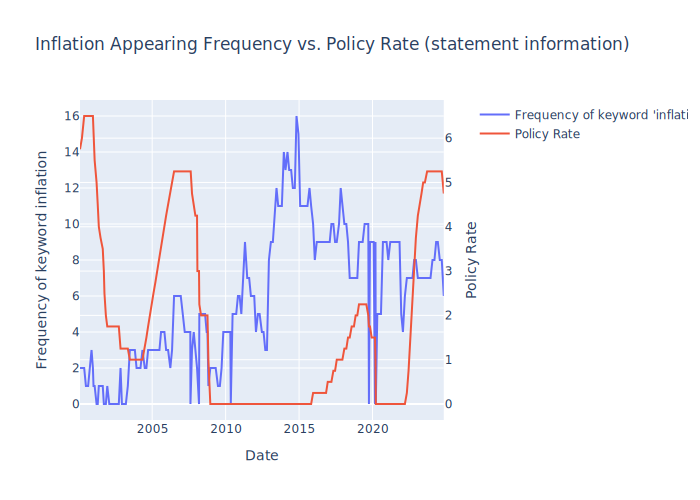

In [56]:
# Create figure with secondary y-axis
fig1 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig1.add_trace(
    go.Scatter(
        x=merged_statements["Date"],
        y=merged_statements["inflation"],
        name="Frequency of keyword 'inflation'",
    ),
    secondary_y=False,
)

fig1.add_trace(
    go.Scatter(
        x=merged_statements["Date"],
        y=merged_statements["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

# Add figure title
fig1.update_layout(title_text=f"Inflation Appearing Frequency vs. Policy Rate (statement information)")

# Set x-axis title
fig1.update_xaxes(title_text="Date")

# Set y-axes titles
fig1.update_yaxes(title_text="Frequency of keyword inflation", secondary_y=False)
fig1.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig1.show()

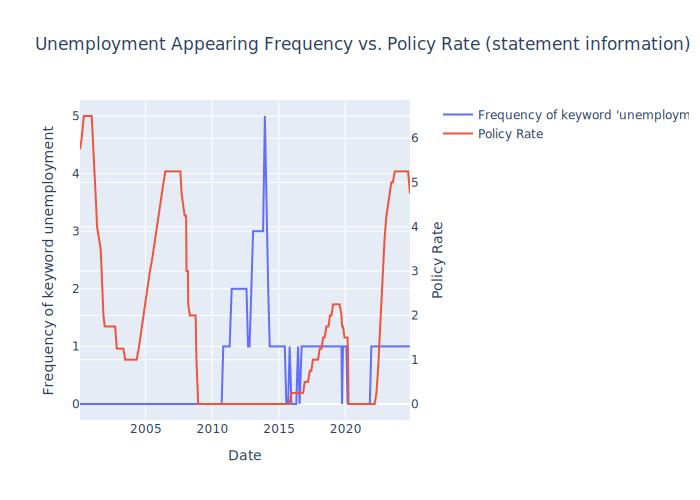

In [57]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

fig2.add_trace(
    go.Scatter(
        x=merged_statements["Date"],
        y=merged_statements["unemployment"],
        name="Frequency of keyword 'unemployment'",
    ),
    secondary_y=False,
)

fig2.add_trace(
    go.Scatter(
        x=merged_statements["Date"],
        y=merged_statements["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

fig2.update_layout(title_text=f"Unemployment Appearing Frequency vs. Policy Rate (statement information)")

fig2.update_xaxes(title_text="Date")

fig2.update_yaxes(title_text="Frequency of keyword unemployment", secondary_y=False)
fig2.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig2.show()

#### 3.3.1.3 Data visualization from minutes

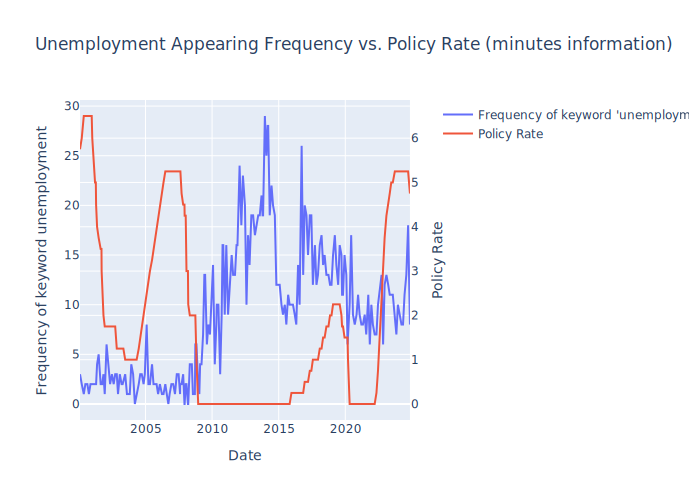

In [58]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])

fig3.add_trace(
    go.Scatter(
        x=merged_minutes["Date"],
        y=merged_minutes["unemployment"],
        name="Frequency of keyword 'unemployment'",
    ),
    secondary_y=False,
)

fig3.add_trace(
    go.Scatter(
        x=merged_minutes["Date"],
        y=merged_minutes["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

fig3.update_layout(title_text=f"Unemployment Appearing Frequency vs. Policy Rate (minutes information)")

fig3.update_xaxes(title_text="Date")

fig3.update_yaxes(title_text="Frequency of keyword unemployment", secondary_y=False)
fig3.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig3.show()

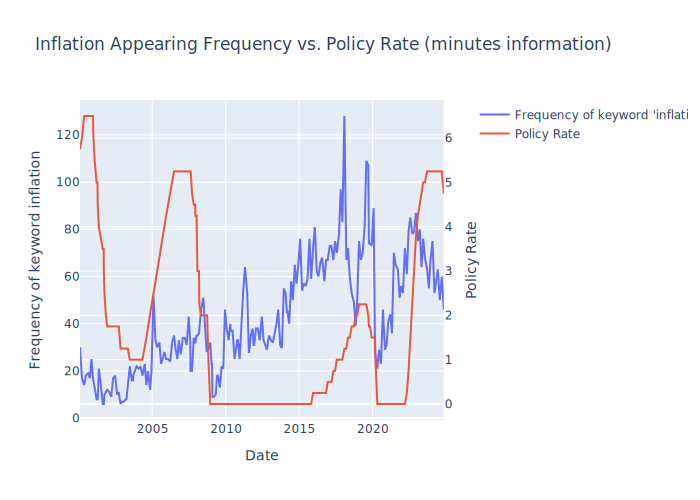

In [59]:
fig4 = make_subplots(specs=[[{"secondary_y": True}]])

fig4.add_trace(
    go.Scatter(
        x=merged_minutes["Date"],
        y=merged_minutes["inflation"],
        name="Frequency of keyword 'inflation'",
    ),
    secondary_y=False,
)

fig4.add_trace(
    go.Scatter(
        x=merged_minutes["Date"],
        y=merged_minutes["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

fig4.update_layout(title_text=f"Inflation Appearing Frequency vs. Policy Rate (minutes information)")

fig4.update_xaxes(title_text="Date")

fig4.update_yaxes(title_text="Frequency of keyword inflation", secondary_y=False)
fig4.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig4.show()

#### 3.3.1 **Conclusion of Frequency Test**
The above graphs illustrate the following findings:
1. Minutes' record of word frequency can expose more information than statements' record does
2. Significant changes in the word frequency to describe the economic outlook can foreshadow the change in interest rate
3. Specifically, the increasing use of the word "inflation" is associated with rate rising in the coming FOMC.

**Inflation Appearing Frequency vs. Policy Rate (minutes information)** shows that the increased use of "inflation" in the following periods foreshadows the rate increase in the coming FOMC meetings:
1. April 2003 to May 2005
2. Oct 2013 to Jan 2018
3. April 2020 to March 2023


**Unemployment Appearing Frequency vs. Policy Rate (minutes information)** shows that the use of "unemployment" may not be as significant as the keyword "inflation" is in predicting the rate cut or rate rise movements

### 3.3.2 TF-IDF Test

The following part utilizes AI to generate the code. The prompt is the following: # prompt: write tf-idf test for dataframe "minutes", only need to run tf-idf operation to the "clean no_stop text". The output is stored in a new dataframe named "tf_idf_score" which contains 3 columns. The first column stores the Date, the second column stores the vocab, and the third column stores tf-idf scores. Specifically, I would like "tf_idf_score" to contain the words that have the top 10 tf-idf scores in each Date. Please remove the words such as "participants", "reserve", "member", and "rate" when calculating the tf-idf score

This is the prompt after I tried to run the test for many rounds and made several adjustments.

#### 3.3.2.1 Create Dataframe to store tf-idf scores for data visualization

**Function to sift the top 10 ti-idf words in each documents** <br>

**Note**: in this step, I will remove the words including ["participants", "reserve", "member", "rate", "committee", "federal"] to exclude the often appearing nouns in the documents

In [60]:
def tf_idf_top_words(df, top_n=10):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Remove specific words
    words_to_remove = ["participants", "reserve", "member", "rate", "committee", "federal"] # List of words to ignore

    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(df['clean no_stop text'])

    # Get feature names (vocabulary)
    feature_names = vectorizer.get_feature_names_out()

    # Create an empty list to store the results
    tf_idf_results = []

    for i in range(len(df)):
        # Get the TF-IDF scores for the current document
        tfidf_scores = tfidf_matrix[i].toarray()[0]

        # Create a dictionary of words and their scores
        word_scores = dict(zip(feature_names, tfidf_scores))

        # Remove unwanted words  # This is where you remove the words
        for word in words_to_remove:
          if word in word_scores:
            del word_scores[word]

        # Sort the words by TF-IDF score in descending order and get the top N words
        top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

        for word, score in top_words:
            tf_idf_results.append([df['Date'][i], word, score])

    # Create the output DataFrame
    tf_idf_score = pd.DataFrame(tf_idf_results, columns=['Date', 'vocab', 'tf-idf scores'])
    return tf_idf_score

**For minutes**

In [61]:
top_minutes = tf_idf_top_words(minutes)
top_minutes.sample(5)

,Date,vocab,tf-idf scores
1802,2004-11-10,likely,0.156687
1780,2005-02-02,shall,0.295500
1413,2008-09-29,credit,0.135238
239,2021-12-15,market,0.125083
1109,2011-09-21,maturity,0.120753


**For Statements**

In [62]:
top_statements = tf_idf_top_words(minutes)
top_statements.sample(5)

,Date,vocab,tf-idf scores
1558,2007-09-18,markets,0.138951
1972,2003-03-25,iraq,0.157739
1570,2007-08-10,financial,0.224263
1592,2007-06-28,growth,0.211475
55,2024-03-20,remained,0.139066


#### 3.3.2.2 Data Visualization

**For Statements**

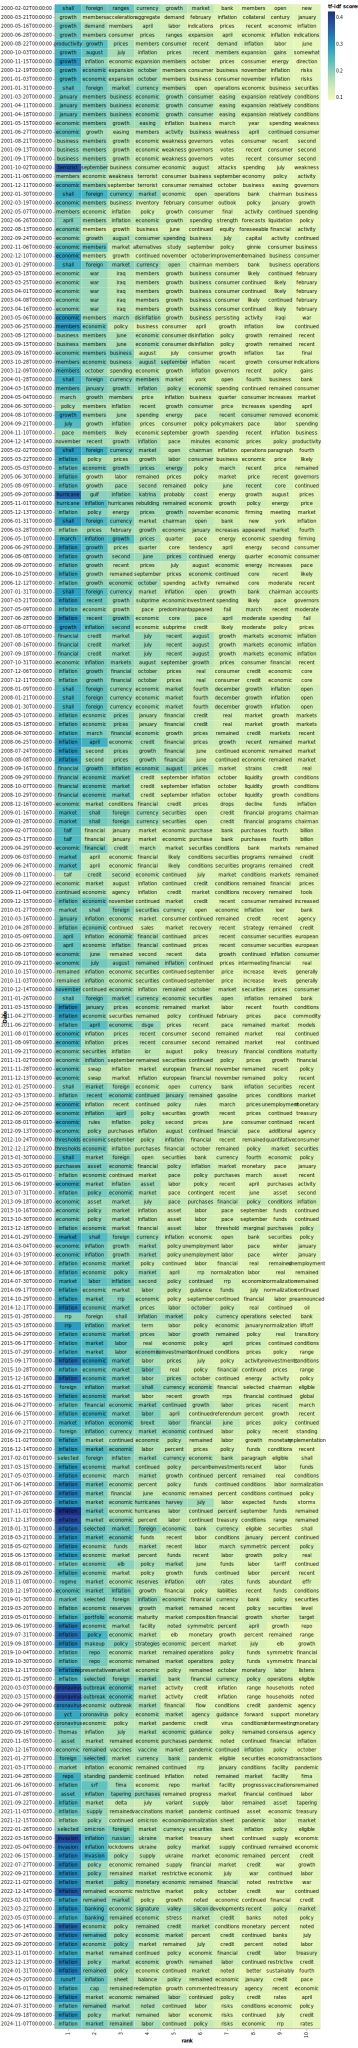

In [63]:
pd.options.display.max_rows = 600
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_statements.copy()
top_tfidf_plusRand['tf-idf scores'] = top_tfidf_plusRand['tf-idf scores'] + np.random.rand(top_statements.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'Date:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tf-idf scores", order="descending")],
    groupby = ["Date"],
)

# heatmap specification, the color follows the number of tfidf
heatmap = base.mark_rect().encode(
    color = 'tf-idf scores:Q'
)


# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'vocab:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
chart2 = (heatmap + text).properties(width=600)

# Force the mimetype renderer and JSON data transformer
alt.renderers.enable('mimetype')
alt.data_transformers.enable('json')

# Save the chart to an HTML file
chart2.save('heatmap2.svg')

# Embed the HTML file in the notebook using IFrame:
from IPython.display import display, SVG
display(SVG(filename='heatmap2.svg'))

**For Minutes**

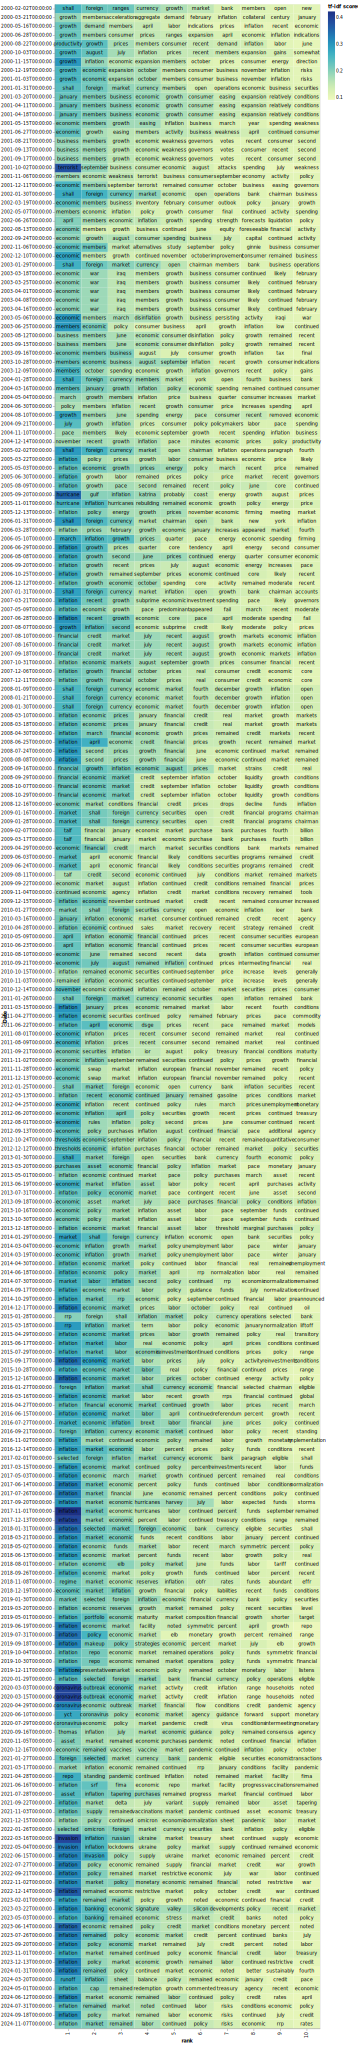

In [64]:
pd.options.display.max_rows = 600
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_minutes.copy()
top_tfidf_plusRand['tf-idf scores'] = top_tfidf_plusRand['tf-idf scores'] + np.random.rand(top_minutes.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'Date:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tf-idf scores", order="descending")],
    groupby = ["Date"],
)

# heatmap specification, the color follows the number of tfidf
heatmap = base.mark_rect().encode(
    color = 'tf-idf scores:Q'
)


# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'vocab:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
chart = (heatmap + text).properties(width=600)


# Force the mimetype renderer and JSON data transformer
alt.renderers.enable('mimetype')
alt.data_transformers.enable('json')

# Save the chart to an HTML file
chart.save('heatmap.svg')

# Embed the HTML file in the notebook using IFrame:
from IPython.display import display, SVG
display(SVG(filename='heatmap.svg'))

#### 3.3.2 **Conclusion of TF-IDF Test**

There are 3 periods of rate rise:
1. June 2004 to July 2006
2. Dec 2015 to Dec 2018
3. March 2022 to August 2023

There are periods of rate cuts:
1. Till Dec 2001
2. Sept 2007 to Dec 2008
3. July 2019 to April 2020
4. Since Sept 2024

From the heatmap, we can confirm the hypothesis that **A significant shift in the language used to describe the economic outlook signals a high probability of changes in policy directly in the incoming FOMC meetings**:
1. When "inflation" became the highest tf-idf word in 2005, in early 2015, and late 2021, there are policy rate rise within half a year
2. Words such as "war", "pandemic", and "growth" often appeared before rate cuts, showing that the exogenous negative shocks and concerns over economic growth can often put significant pressure on the Fed decision. The Fed would then choose to cut the rate

### 3.3.3 Setiment Test

#### 3.3.3.1 Function to process data
This part will create a function to process the cleaned text and analyze the sentiment score.

The sentiment score is referred to the ['Loughran-McDonald Master Dictionary w/ Sentiment Word Lists'](https://sraf.nd.edu/loughranmcdonald-master-dictionary/).

The sentiment score is now integer, with greater number marking positive.

This part, I utilized the ChatGPT for assistance to apply the Financial Sentiment Word List. By feeding it the prompt: Please design a function that can calculate the sentiments score of text based on the following csv records. I uploaded the sentiment dictionary to ChatGPT so that the AI can analyze the proper way to utilize the sentiments scores stored in the file.

In [65]:
from collections import Counter
lm_dict = pd.read_csv('/content/drive/MyDrive/text_analysis/Financial_dic.csv')
lm_words = set(lm_dict['Word'])

# Preprocess text
def preprocess(text):
    return [word.upper() for word in text.split() if word.isalpha()]

# Match words to dictionary
def sentiment_analysis(text):
    words = preprocess(text)
    word_count = Counter(words)
    sentiment_counts = {cat: 0 for cat in ['Positive', 'Negative', 'Uncertainty']}

    for word in words:
        if word in lm_words:
            for cat in sentiment_counts.keys():
                if word in lm_dict[lm_dict[cat] > 0]['Word'].values:
                    sentiment_counts[cat] += word_count[word]
    return sentiment_counts


def analyze_sentiment_statements(df):
    sentiment_scores = []
    for index, row in df.iterrows():
        text = row['clean no_stop text']
        sentiment_counts = sentiment_analysis(text)  # Get sentiment counts

        # Calculate a single sentiment score (e.g., positive - negative)
        sentiment_score = sentiment_counts['Positive'] - sentiment_counts['Negative']

        sentiment_scores.append([row['Date'], sentiment_score])

    sentiment_df = pd.DataFrame(sentiment_scores, columns=['Date', 'Sentiment Score'])
    return sentiment_df


#### 3.3.3.2 Applying function to the text
Due to over 30 minutes processing time, I have save the processed result into a csv file in my Google Doc

In [66]:
statements_sentiment = analyze_sentiment_statements(statements)

In [67]:
minutes_sentiment = analyze_sentiment_statements(minutes)

In [68]:
# the following part is to read the data quickly withnot requiring the program to process the data again
'''
minutes_sentiment = pd.read_csv('/content/drive/MyDrive/text_analysis/minutes_sentiment_big.csv')
statements_sentiment = pd.read_csv('/content/drive/MyDrive/text_analysis/statements_sentiment.csv')
statements_sentiment["Date"] = pd.to_datetime(statements_sentiment["Date"])
minutes_sentiment["Date"] = pd.to_datetime(minutes_sentiment["Date"])
'''

'\nminutes_sentiment = pd.read_csv(\'/content/drive/MyDrive/text_analysis/minutes_sentiment_big.csv\')\nstatements_sentiment = pd.read_csv(\'/content/drive/MyDrive/text_analysis/statements_sentiment.csv\')\nstatements_sentiment["Date"] = pd.to_datetime(statements_sentiment["Date"])\nminutes_sentiment["Date"] = pd.to_datetime(minutes_sentiment["Date"])\n'

**Result Preview:**

In [69]:
statements_sentiment.head()

,Date,Sentiment Score
0,2024-11-07,2
1,2024-09-18,7
2,2024-07-31,5
3,2024-06-12,5
4,2024-05-01,2


In [70]:
minutes_sentiment.head()

,Date,Sentiment Score
0,2024-11-07,-250
1,2024-09-18,-336
2,2024-07-31,-163
3,2024-06-12,-57
4,2024-05-01,-115


In [71]:
# Merge interest rates with statements
minutes_sentiment_date = pd.merge(minutes_sentiment, final_rates, left_on='Date', right_on='Date', how='left')

# Merge interest rates with minutes
statements_sentiment_date = pd.merge(statements_sentiment, final_rates, left_on='Date', right_on='Date', how='left')

In [72]:
minutes_sentiment_date.head()

,Date,Sentiment Score,Policy Rate
0,2024-11-07,-250,4.75
1,2024-09-18,-336,5.25
2,2024-07-31,-163,5.25
3,2024-06-12,-57,5.25
4,2024-05-01,-115,5.25


In [73]:
statements_sentiment_date.head()

,Date,Sentiment Score,Policy Rate
0,2024-11-07,2,4.75
1,2024-09-18,7,5.25
2,2024-07-31,5,5.25
3,2024-06-12,5,5.25
4,2024-05-01,2,5.25


#### 3.3.3.3 Data Visualization

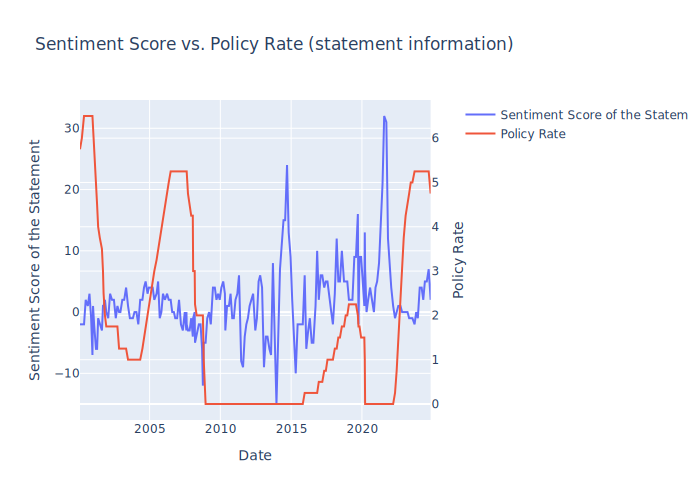

In [74]:
fig5 = make_subplots(specs=[[{"secondary_y": True}]])

fig5.add_trace(
    go.Scatter(
        x=statements_sentiment_date["Date"],
        y=statements_sentiment_date["Sentiment Score"],
        name="Sentiment Score of the Statement'",
    ),
    secondary_y=False,
)

fig5.add_trace(
    go.Scatter(
        x=statements_sentiment_date["Date"],
        y=statements_sentiment_date["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

fig5.update_layout(title_text=f"Sentiment Score vs. Policy Rate (statement information)")

fig5.update_xaxes(title_text="Date")

fig5.update_yaxes(title_text="Sentiment Score of the Statement", secondary_y=False)
fig5.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig5.show()

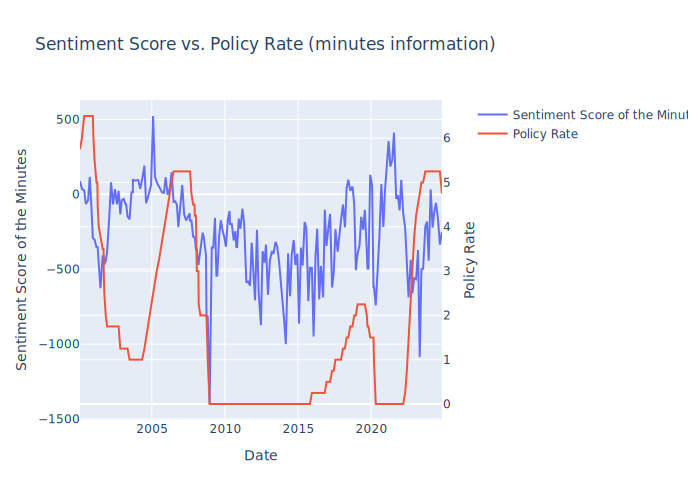

In [75]:
fig6 = make_subplots(specs=[[{"secondary_y": True}]])

fig6.add_trace(
    go.Scatter(
        x=minutes_sentiment_date["Date"],
        y=minutes_sentiment_date["Sentiment Score"],
        name="Sentiment Score of the Minutes'",
    ),
    secondary_y=False,
)

fig6.add_trace(
    go.Scatter(
        x=minutes_sentiment_date["Date"],
        y=minutes_sentiment_date["Policy Rate"],
        name="Policy Rate",
    ),
    secondary_y=True,
)

fig6.update_layout(title_text=f"Sentiment Score vs. Policy Rate (minutes information)")

fig6.update_xaxes(title_text="Date")

fig6.update_yaxes(title_text="Sentiment Score of the Minutes", secondary_y=False)
fig6.update_yaxes(title_text="Policy Rate", secondary_y=True)

fig6.show()

#### 3.3.3 **Conclusion of Sentiment Test**

The visualizations of this part **approve** the original hypothesis and show that **an increase in the use of positive language is associated with a reduced likelihood of an imminent rate cut or increased likelihood of rate hikes.** <br>

Minutes' texts display a more illustrative result than statements' result, the findings are the following:
1. The positive trend of the text can foreshadow or appear concurrently with the policy action of rate rise
2. The negative trend of the text can foreshadow or appear concurrently with the policy action of rate cut

Conjecture: This may imply that the Fed would consider the economy resilient when taking tightening actions. The Fed may move to take monetary easing when they perceive the negative factor within the market.


# **PART 4**: Conclusion and Policy Implication

## 4.1 Conclusion to the overall project

**Conclusion:** <br>
After three rounds of test, this project reaches the following conclusion regarding the hypotheses:
1. An increase in the use of positive language is associated with a reduced likelihood of an imminent rate cut or an increased likelihood of rate hikes
2. Significant shifts in the language used to describe the economic outlook signals a high probability of changes in policy directly in the incoming FOMC meetings.

The confirmation of the hypotheses reflects that the policy information from the FOMC statements is meaningful and useful to projecting the policy intentions and potential directions.



**Policy Implication**: <br>
From a policy analyst’s viewpoint, the findings on the FOMC’s communication underline the importance of monitoring and evaluating the language used in public releases. Analysts should focus on:
1. Market Sentiment Analysis: Utilize sentiment analysis and computational tools to identify patterns in tone shifts (e.g., from optimism to caution) and correlate these with subsequent monetary policy decisions and market reactions.
2. Predictive Modeling: Develop predictive models to analyze the potential impacts of language changes in FOMC statements on financial markets, helping to forecast the implications of various policy scenarios.
3. Policy Communication Assessment: Regularly assess how clearly the FOMC’s language conveys its economic outlook and policy intentions. This can help to improve transparency and reduce market speculation.

From a policymaker’s perspective, the findings stress the strategic importance of language in achieving monetary policy objectives. Policymakers should consider:
1. Strategic Communication: Craft language carefully to send deliberate signals to the market, ensuring alignment with monetary policy objectives. Policymakers should be mindful of how subtle tone changes can influence market sentiment and expectations.
2. Gradual Signaling: Use incremental shifts in language to prepare markets for policy changes, reducing the likelihood of sudden disruptions while maintaining credibility.

By adopting these tailored approaches, analysts can enhance their evaluation frameworks, while policymakers can strengthen their communication strategies to ensure alignment with macroeconomic goals and market stability.

**Future Improvement**: <br>
1. Advanced Text Analysis:
  - Apply more sophisticated natural language processing (NLP) techniques, such as transformer-based models (e.g., BERT or GPT), to detect nuanced language shifts.
  - Incorporate semantic analysis to better understand implied policy intentions.
2. Policy Simulation Tool:
  - Develop an interactive simulation to test alternative FOMC statements and predict potential market responses

# Part 5: reference and citation
citation list:
1. Board of Governors of the Federal Reserve System (US), Federal Funds Target Rate (DISCONTINUED) [DFEDTAR], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DFEDTAR, December 16, 2024.
2. Board of Governors of the Federal Reserve System (US), Federal Funds Target Range - Lower Limit [DFEDTARL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DFEDTARL, December 16, 2024.
3. Vlad, FOMC Meeting Statements & Minutes, retrieved from Kaggle, https://www.kaggle.com/datasets/vladtasca/fomc-meeting-statements-and-minutes/data, December 16, 2024
4. Loughran-McDonald Master Dictionary w/ Sentiment Word Lists, University of Notre Dame, retrieved from https://sraf.nd.edu/loughranmcdonald-master-dictionary/, December 16, 2024
5. Federal Reserve Bank of Chicago, The Federal Reserve's Dual Mandate, retrieved from https://www.chicagofed.org/research/dual-mandate/dual-mandate#:~:text=Our%20two%20goals%20of%20price%20stability%20and%20maximum,broad%20concepts%20into%20specific%20longer-run%20goals%20and%20strategies., December 16, 2024